<a href="https://colab.research.google.com/github/luongvantuit/learn-ai-with-python/blob/master/k-means/BT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [3]:
def kmeans_init_centers(X, k):
  # randomly pick k rows of X as initial centers
  return X[np.random.choice(X.shape[0], k, replace=False)]

In [4]:
def kmeans_assign_labels(X, centers):
  # calculate pairwise distances btw data and centers
  D = cdist(X, centers)
  # return index of the closest center
  return np.argmin(D, axis = 1)

In [5]:
def kmeans_update_centers(X, labels, K):
  centers = np.zeros((K, X.shape[1]))
  for k in range(K):
    # collect all points assigned to the k-th cluster
    Xk = X[labels == k, :]
    # take average
    centers[k,:] = np.mean(Xk, axis = 0)
  return centers

In [6]:
def has_converged(centers, new_centers):
  # return True if two sets of centers are the same
  return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

In [21]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import os
from sklearn.datasets import load_files
import cv2

# Hàm load dữ liệu ảnh và chuyển đổi thành ma trận đầu vào
def load_image_data(folder, image_size=(64, 64)):
    images = []
    labels = []
    label_names = os.listdir(folder)
    for label in label_names:
        img_dir = os.path.join(folder, label)
        for filename in os.listdir(img_dir):
          img_path = os.path.join(img_dir, filename)
          img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
          if img is not None:
            img = cv2.resize(img, image_size)
            images.append(img.flatten())  # Chuyển ảnh thành vector 1D
            labels.append(0 if label == 'cats' else 1)  # Gán nhãn (0 cho mèo, 1 cho chó)
    return np.array(images), np.array(labels)

# Load ảnh chó-mèo
X, y = load_image_data('/content/drive/My Drive/Machine Learning/Dataset/Animals')

In [37]:
K=2
# Chạy KMeans với số cụm K=2
centers, labels, iterations = kmeans(X, K)

# Hiển thị kết quả
print("Số lần lặp:", iterations)
print("Nhãn phân cụm:", labels[-1])

Số lần lặp: 11
Nhãn phân cụm: [1 0 0 ... 1 0 0]


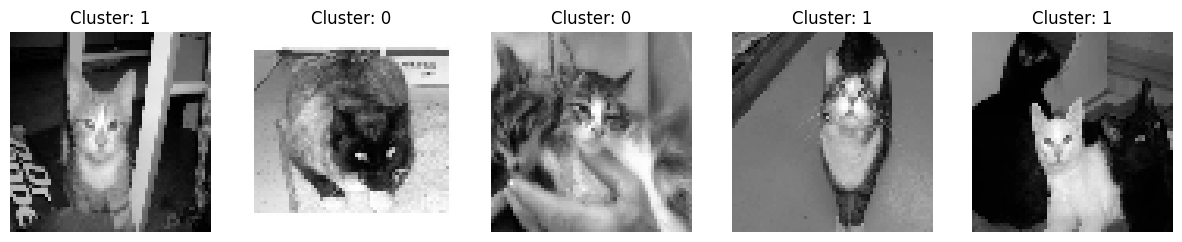

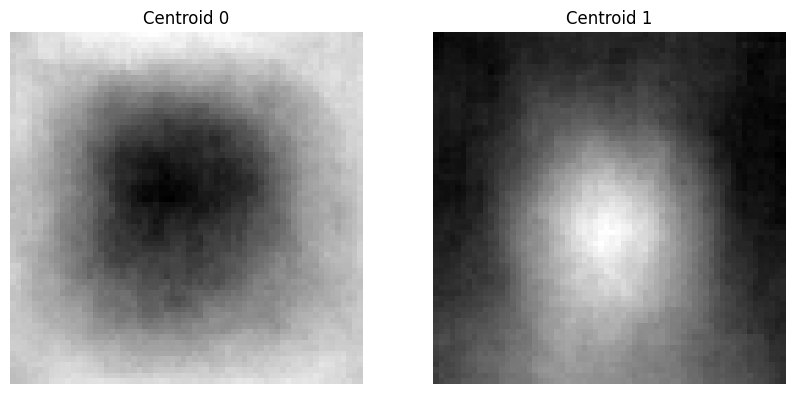

In [38]:
# Hiển thị kết quả phân cụm
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(64, 64), cmap='gray')  # Hiển thị ảnh gốc
    ax.set_title(f'Cluster: {labels[-1][i]}')  # Hiển thị nhãn phân cụm
    ax.axis('off')
plt.show()

# Hiển thị các tâm cụm
centroids_images = np.array(centers[-1]).reshape(K, 64, 64)

plt.figure(figsize=(10, 5))
for i in range(K):
    plt.subplot(1, K, i + 1)
    plt.imshow(centroids_images[i], cmap='gray')
    plt.title(f'Centroid {i}')
    plt.axis('off')
plt.show()

In [45]:
from scipy.stats import mode

# Lấy nhãn dự đoán từ KMeans
predicted_labels = labels[-1]  # Nhãn của lần chạy cuối cùng

# Ánh xạ các cụm KMeans với nhãn thực tế
mapped_labels = np.zeros_like(predicted_labels)

for i in range(K):
    # Lấy các chỉ số của các điểm trong cụm i
    cluster_points = np.where(predicted_labels == i)[0]

    # Lấy nhãn thực tế trong cụm
    cluster_labels = y[cluster_points]

    # Lấy nhãn phổ biến nhất trong cụm
    mode_result = mode(cluster_labels)

    # Kiểm tra nếu mode_result.mode là mảng hoặc scalar
    if isinstance(mode_result.mode, np.ndarray):
        most_common_label = mode_result.mode[0]  # Lấy nhãn phổ biến nhất
    else:
        most_common_label = mode_result.mode  # Trường hợp mode_result.mode là scalar

    # Ánh xạ nhãn thực tế vào cụm
    mapped_labels[cluster_points] = most_common_label

In [46]:
from sklearn.metrics import accuracy_score

# Tính độ chính xác
accuracy = accuracy_score(y, mapped_labels)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.5480
